In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load dataset
df = pd.read_csv('/Users/meghanayalam/Documents/github_projects/customer-churn-prediction/data/customer_churn.csv')

# Display first few rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# Convert TotalCharges to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Replace NaN with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [5]:
# Check available columns
df.columns

# 'customerID' was not present so we skip dropping it
# If needed in other datasets, you can use: df.drop(['customerID'], axis=1, inplace=True)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Label encode the target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Separate categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [7]:
# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Standardize numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7863733144073811

Confusion Matrix:
 [[990  46]
 [255 118]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      1036
           1       0.72      0.32      0.44       373

    accuracy                           0.79      1409
   macro avg       0.76      0.64      0.65      1409
weighted avg       0.78      0.79      0.75      1409



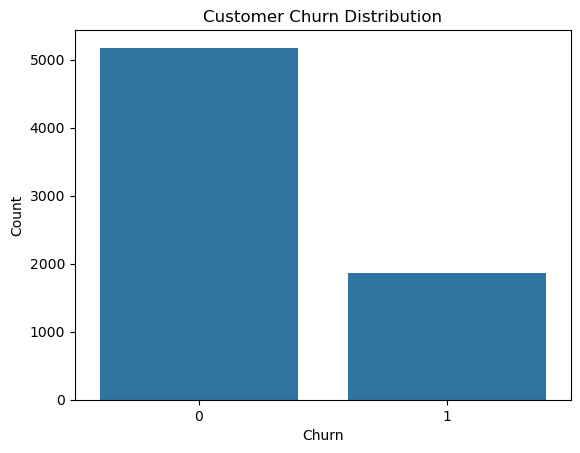

In [11]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))



Logistic Regression Accuracy: 0.7864
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1036
           1       0.72      0.32      0.44       373

    accuracy                           0.79      1409
   macro avg       0.76      0.64      0.65      1409
weighted avg       0.78      0.79      0.75      1409


Decision Tree Accuracy: 0.7736
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1036
           1       0.59      0.47      0.53       373

    accuracy                           0.77      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.77      0.77      1409


Random Forest Accuracy: 0.8055
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.71      0.45      0.55       373

    accuracy                           0.81      1409
   macro avg       0.77   

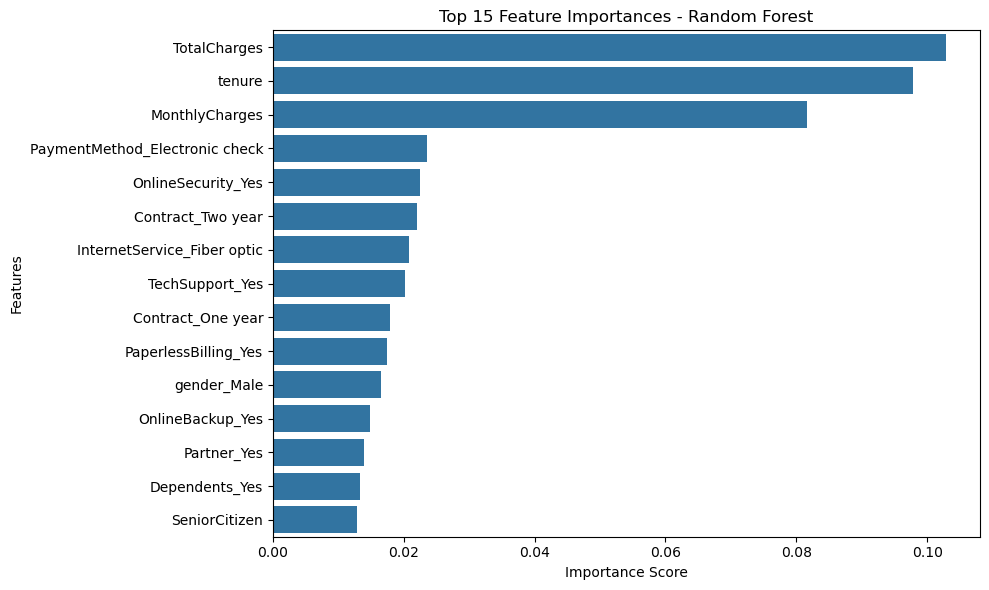

In [18]:
importances = models['Random Forest'].feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)[:15]

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig('../outputs/plots/feature_importance.png')
plt.show()


In [19]:
import joblib

# Save model and scaler
joblib.dump(models['Random Forest'], '../models/random_forest_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')


['../models/scaler.pkl']

In [20]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Create directories
os.makedirs("../models", exist_ok=True)
os.makedirs("../outputs/plots", exist_ok=True)

# Step 2: Load data
df = pd.read_csv('../data/customer_churn.csv')

# Step 3: Clean data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Step 4: Visualizations
# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.savefig('../outputs/plots/churn_distribution.png')
plt.close()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('../outputs/plots/heatmap.png')
plt.close()

# Categorical vs Churn
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'../outputs/plots/{col}_vs_churn.png')
    plt.close()

# Step 5: Encode categoricals
df = pd.get_dummies(df, drop_first=True)

# Step 6: Split & scale
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, '../models/scaler.pkl')

# Step 7: Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"🔍 {name} Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Save model
    joblib.dump(model, f'../models/{name.lower().replace(" ", "_")}.pkl')

# Step 8: Feature Importance (for tree-based)
tree_models = ['Random Forest', 'XGBoost', 'Decision Tree']
for name in tree_models:
    model = models[name]
    importances = model.feature_importances_
    features = df.drop('Churn', axis=1).columns

    imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    imp_df.sort_values(by='Importance', ascending=False, inplace=True)

    plt.figure(figsize=(10,6))
    sns.barplot(x='Importance', y='Feature', data=imp_df.head(15))
    plt.title(f'{name} - Top 15 Feature Importances')
    plt.tight_layout()
    plt.savefig(f'../outputs/plots/{name.lower().replace(" ", "_")}_importance.png')
    plt.close()

# Step 9: Model Comparison
plt.figure(figsize=(8,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('../outputs/plots/model_comparison.png')
plt.close()


ValueError: could not convert string to float: '7590-VHVEG'

<Figure size 1200x800 with 0 Axes>

In [21]:
# ============================
# 📦 Imports & Configuration
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

import warnings
warnings.filterwarnings('ignore')

# ============================
# 📁 Load Dataset
# ============================
df = pd.read_csv('/Users/meghanayalam/Documents/github_projects/customer-churn-prediction/data/customer_churn.csv')

# ============================
# 🔍 Data Cleaning
# ============================
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# ============================
# 🔁 Encode Categorical Variables
# ============================
df_copy = df.copy()
le = LabelEncoder()
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        df_copy[col] = le.fit_transform(df_copy[col])

# ============================
# 📊 Advanced Visualizations
# ============================

# Create output folder if not exists
os.makedirs('../outputs/plots', exist_ok=True)

# 1. Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.savefig('../outputs/plots/churn_distribution.png')
plt.close()

# 2. Correlation Heatmap (on encoded df)
plt.figure(figsize=(12, 8))
sns.heatmap(df_copy.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('../outputs/plots/heatmap.png')
plt.close()

# 3. Feature Importance (Random Forest)
X = df_copy.drop('Churn', axis=1)
y = df_copy['Churn']

model_rf = RandomForestClassifier()
model_rf.fit(X, y)

feat_imp = pd.Series(model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance - Random Forest")
plt.savefig('../outputs/plots/feature_importance_rf.png')
plt.close()

# ============================
# ✂️ Train-Test Split & Scaling
# ============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================
# 🔁 Try More Models
# ============================
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"Model: {name}")
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))
    print("="*50)

# ============================
# 💾 Save Artifacts
# ============================
os.makedirs('../models', exist_ok=True)
joblib.dump(models['Random Forest'], '../models/random_forest_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')


Model: Logistic Regression
[[935 101]
 [158 215]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Model: Decision Tree
[[838 198]
 [188 185]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1036
           1       0.48      0.50      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

Model: Random Forest
[[940  96]
 [185 188]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.66      0.50      0.57       373

    accuracy                           0.80 

['../models/scaler.pkl']

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.makedirs('../outputs/plots', exist_ok=True)

# Load dataset
df = pd.read_csv('../data/customer_churn.csv')

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Convert 'TotalCharges' to numeric and handle errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


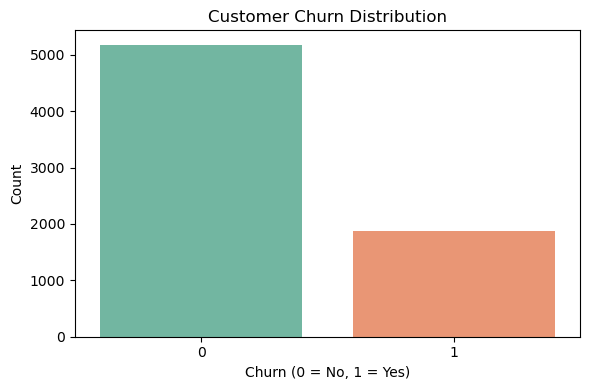

In [23]:
# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../outputs/plots/churn_distribution.png')
plt.show()


This plot shows the class imbalance between customers who have churned (1) and those who haven’t (0). It's important because class imbalance can affect model performance. Saving the plot also helps with reporting later.


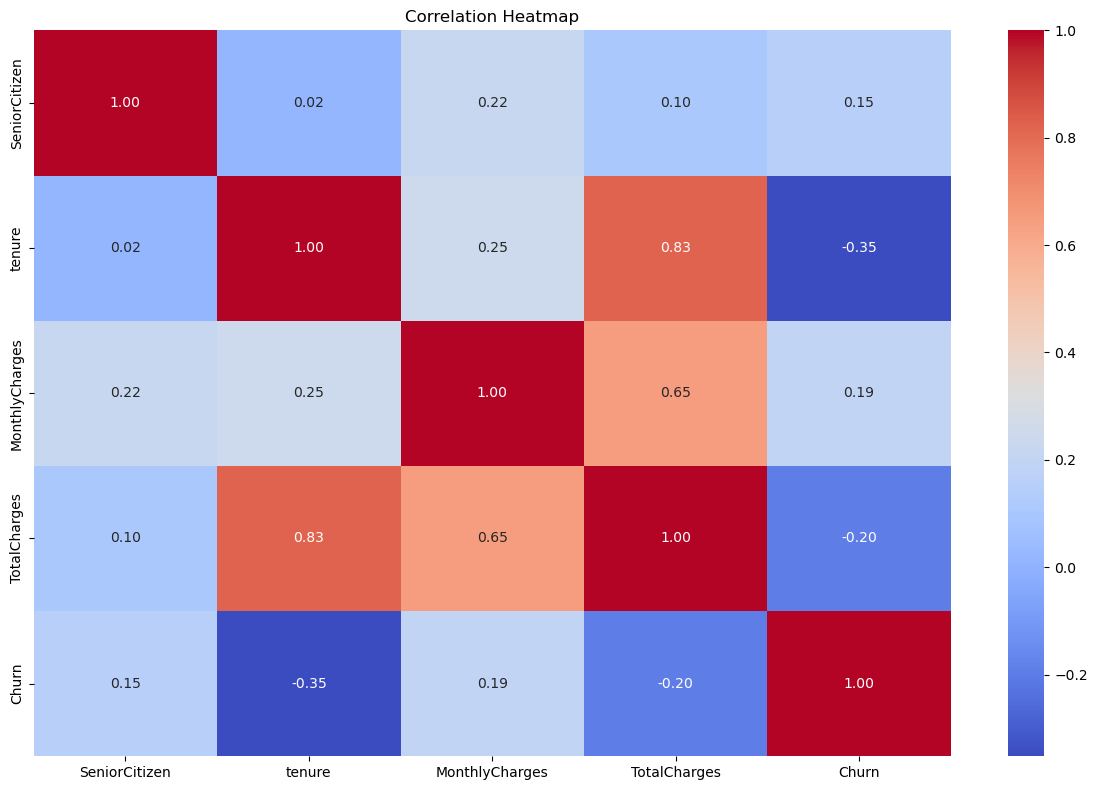

In [24]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('../outputs/plots/correlation_heatmap.png')
plt.show()


The heatmap shows how strongly numerical features correlate with each other. For example, you might find that MonthlyCharges and TotalCharges are positively correlated.

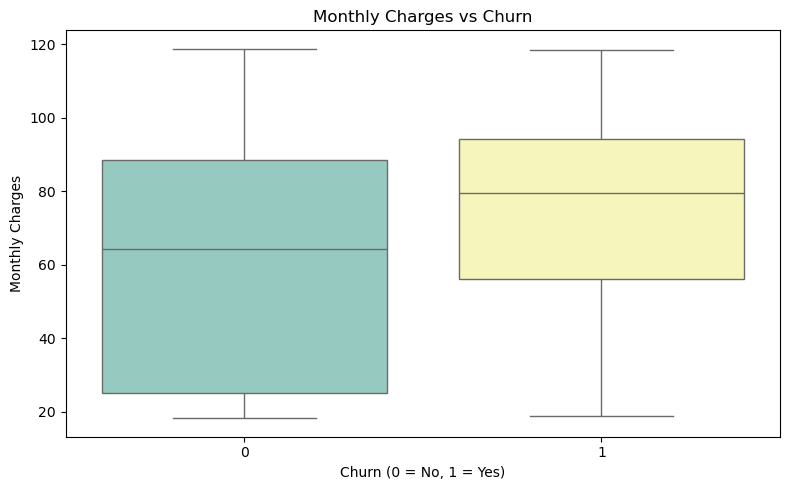

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set3')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges')
plt.tight_layout()
plt.savefig('../outputs/plots/monthlycharges_vs_churn.png')
plt.show()


This boxplot visualizes how MonthlyCharges differ for customers who churned versus those who didn’t. Usually, higher charges are more associated with churn.

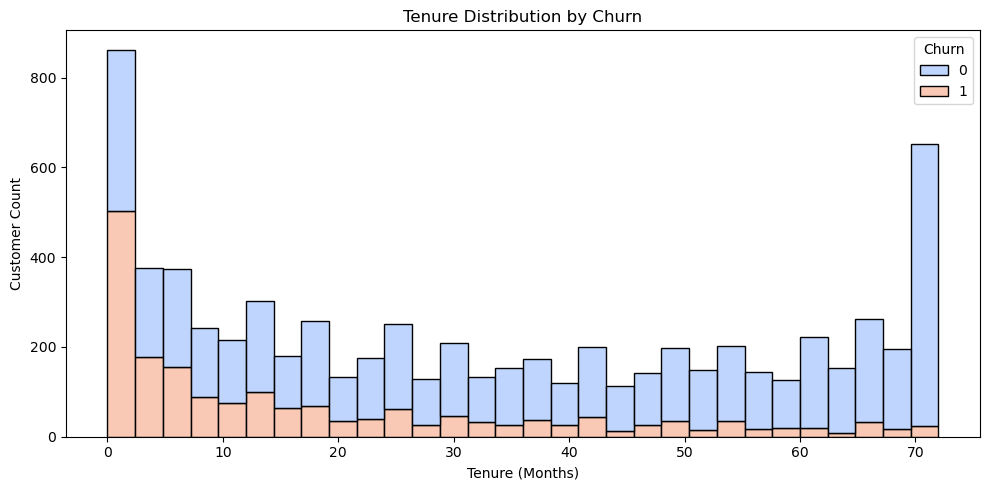

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette='coolwarm')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.savefig('../outputs/plots/tenure_distribution.png')
plt.show()


This histogram shows how long customers stayed (in months). If more churn occurs at lower tenures, it may indicate dissatisfaction early in the customer lifecycle.

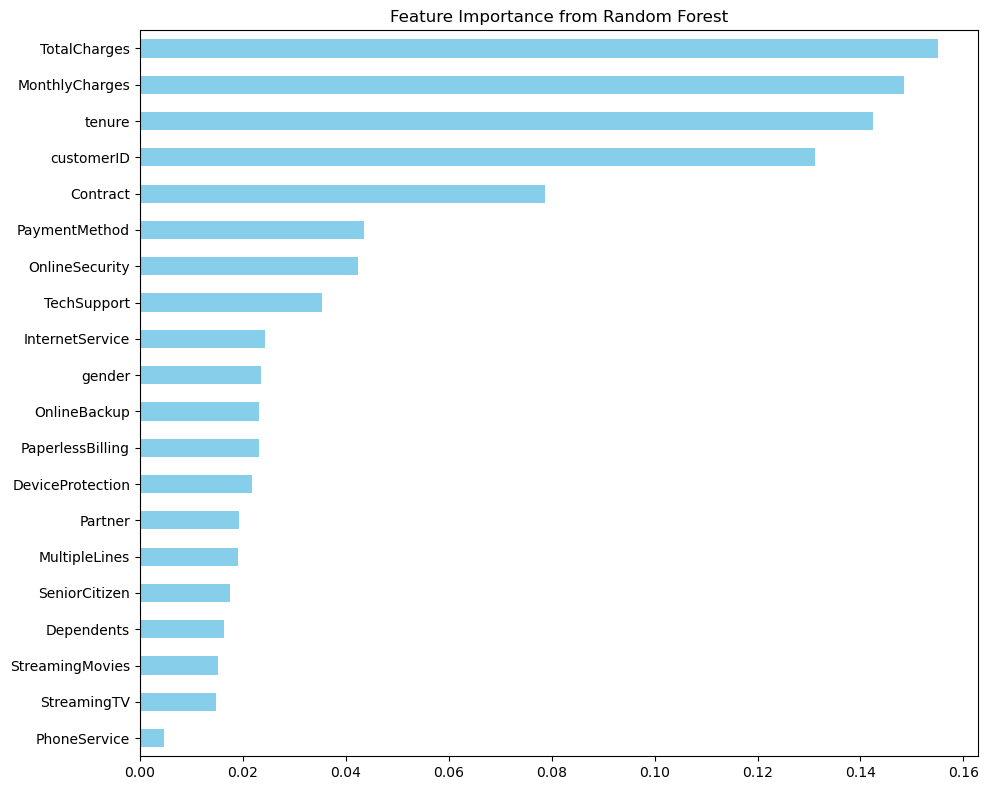

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode all categorical features
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Split into X and y
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 8))
importances.plot(kind='barh', color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.savefig('../outputs/plots/feature_importance_rf.png')
plt.show()


This plot shows which features are most important to the Random Forest model. Higher bars indicate greater influence on predicting churn (e.g., Contract, tenure, MonthlyCharges).

In [29]:
# 1️⃣ Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

import shap
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

# 2️⃣ Load Dataset
df = pd.read_csv("../data/customer_churn.csv")  # change path if needed
print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
# Clean TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop customerID (not useful)
df.drop('customerID', axis=1, inplace=True)

# Label encode binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Train-test split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler
os.makedirs('../models', exist_ok=True)
joblib.dump(scaler, '../models/scaler.joblib')


['../models/scaler.joblib']

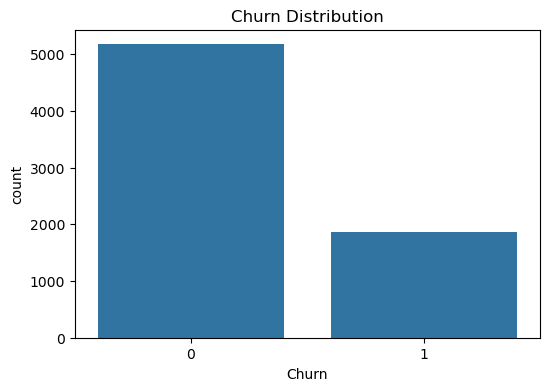

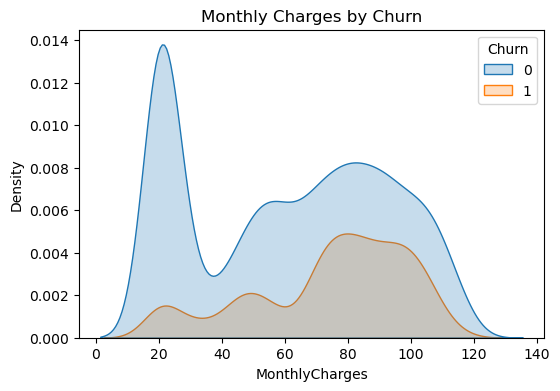

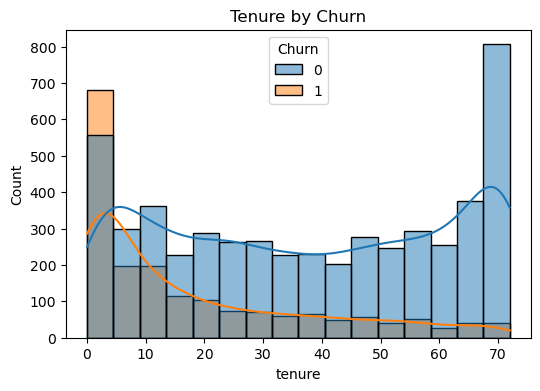

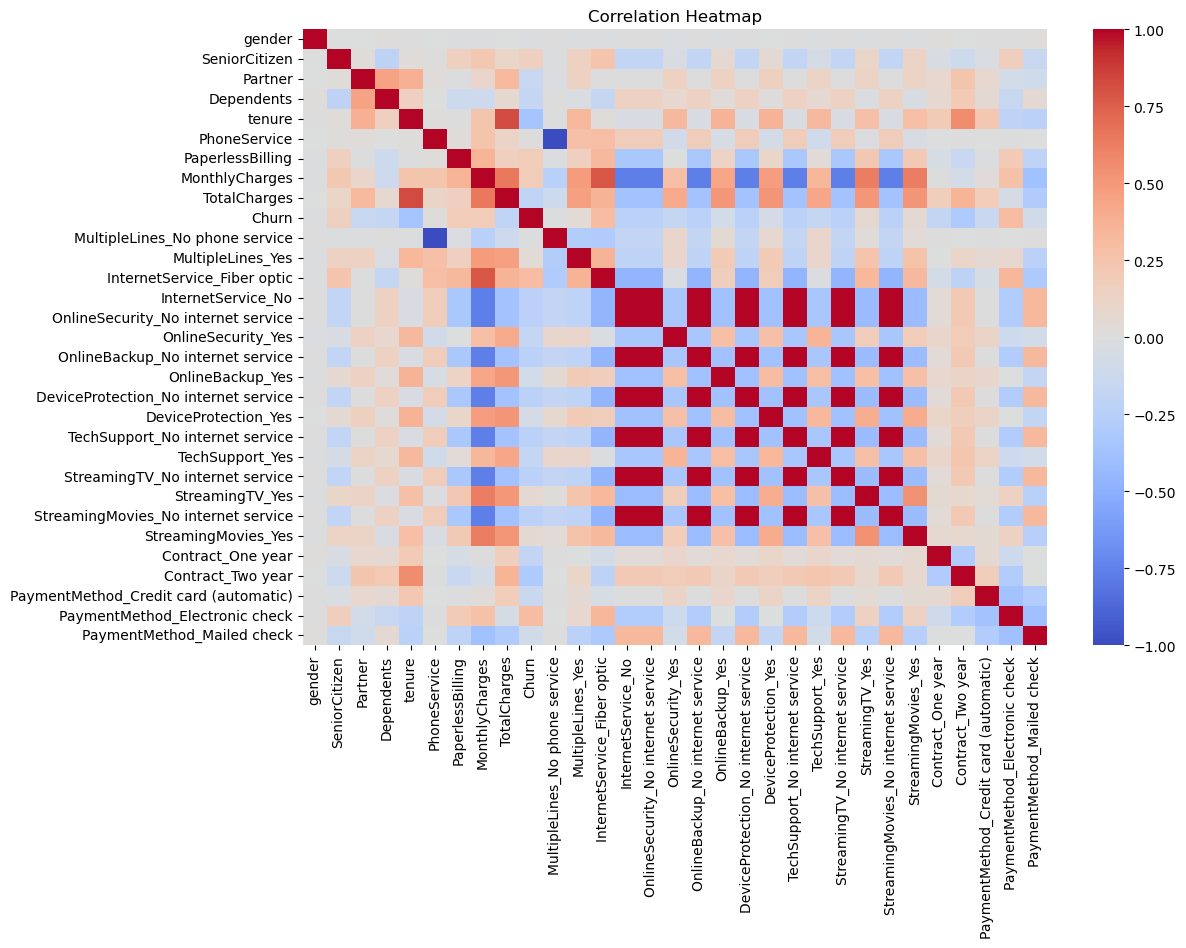

In [31]:
# Create output folder for plots
os.makedirs('../outputs/plots', exist_ok=True)

# 1. Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.savefig('../outputs/plots/churn_distribution.png')
plt.show()

# 2. MonthlyCharges vs Churn
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True)
plt.title("Monthly Charges by Churn")
plt.savefig('../outputs/plots/monthly_charges_churn.png')
plt.show()

# 3. Tenure vs Churn
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True)
plt.title("Tenure by Churn")
plt.savefig('../outputs/plots/tenure_churn.png')
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig('../outputs/plots/correlation_heatmap.png')
plt.show()


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {
        'accuracy': acc,
        'classification_report': report,
        'confusion_matrix': cm,
        'model': model
    }
    print(f"\n🔍 Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))



🔍 Model: Logistic Regression
Accuracy: 0.8197
Confusion Matrix:
 [[933 103]
 [151 222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409


🔍 Model: Decision Tree
Accuracy: 0.7040
Confusion Matrix:
 [[826 210]
 [207 166]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1036
           1       0.44      0.45      0.44       373

    accuracy                           0.70      1409
   macro avg       0.62      0.62      0.62      1409
weighted avg       0.70      0.70      0.70      1409


🔍 Model: Random Forest
Accuracy: 0.7935
Confusion Matrix:
 [[946  90]
 [201 172]]
Classification Report:
               preci

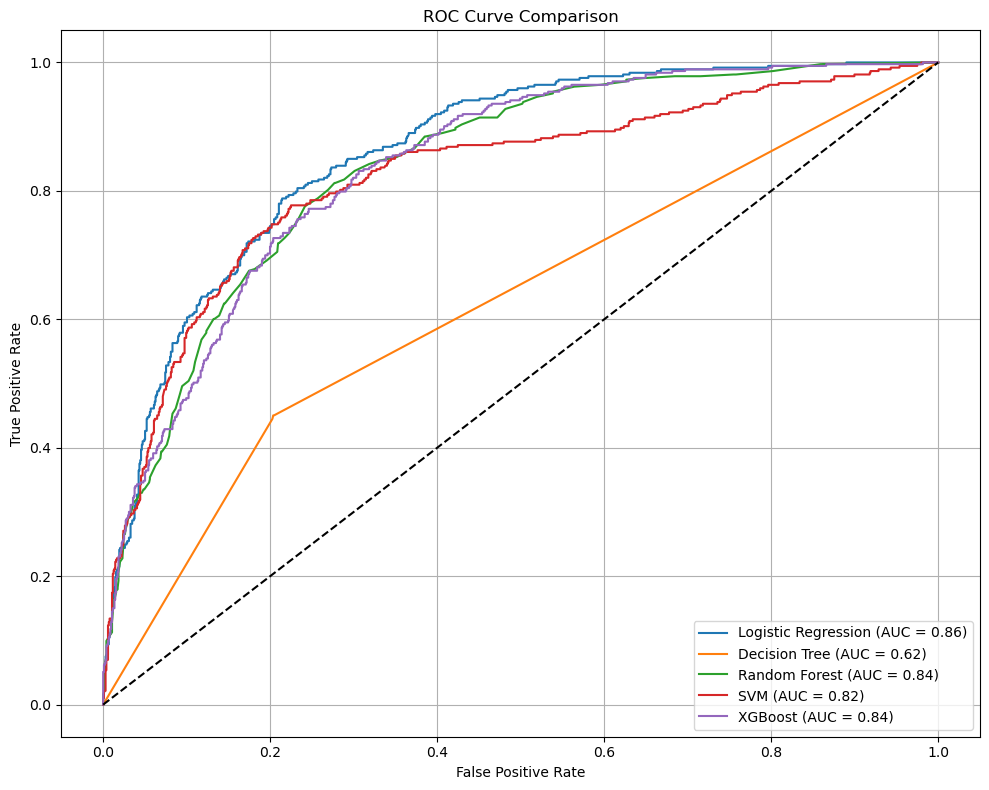

In [33]:
plt.figure(figsize=(10, 8))

for name, result in results.items():
    model = result['model']
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig('../outputs/plots/roc_curve_comparison.png')
plt.show()


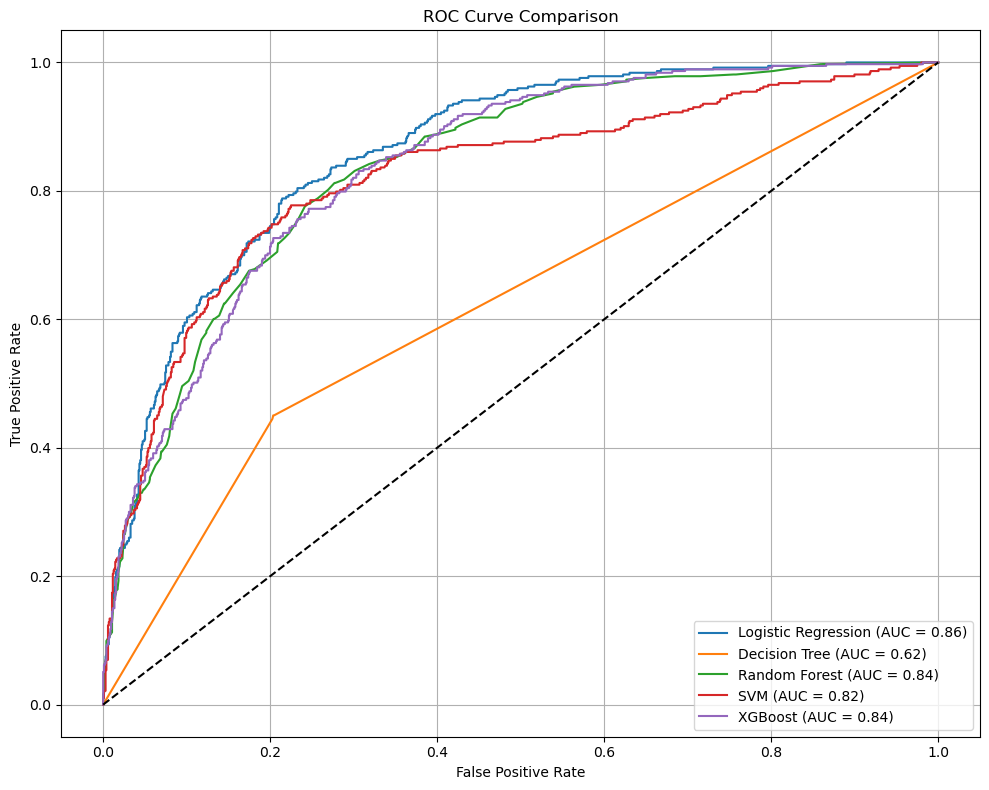

In [34]:
plt.figure(figsize=(10, 8))

for name, result in results.items():
    model = result['model']
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig('../outputs/plots/roc_curve_comparison.png')
plt.show()


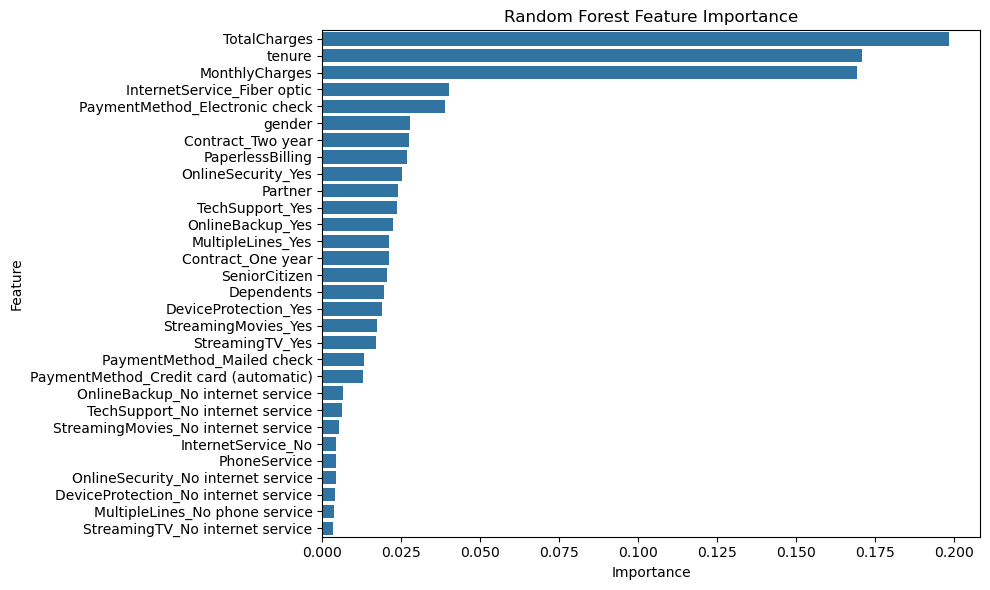

In [35]:
# Random Forest Feature Importance
rf_model = results['Random Forest']['model']
importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.savefig('../outputs/plots/random_forest_feature_importance.png')
plt.show()


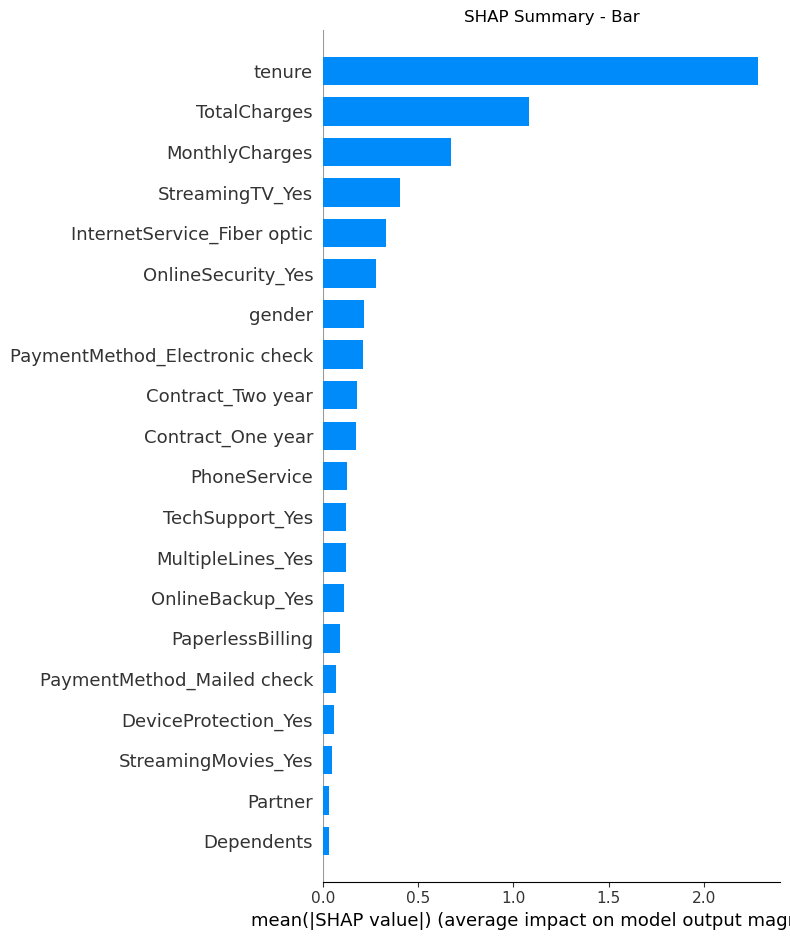

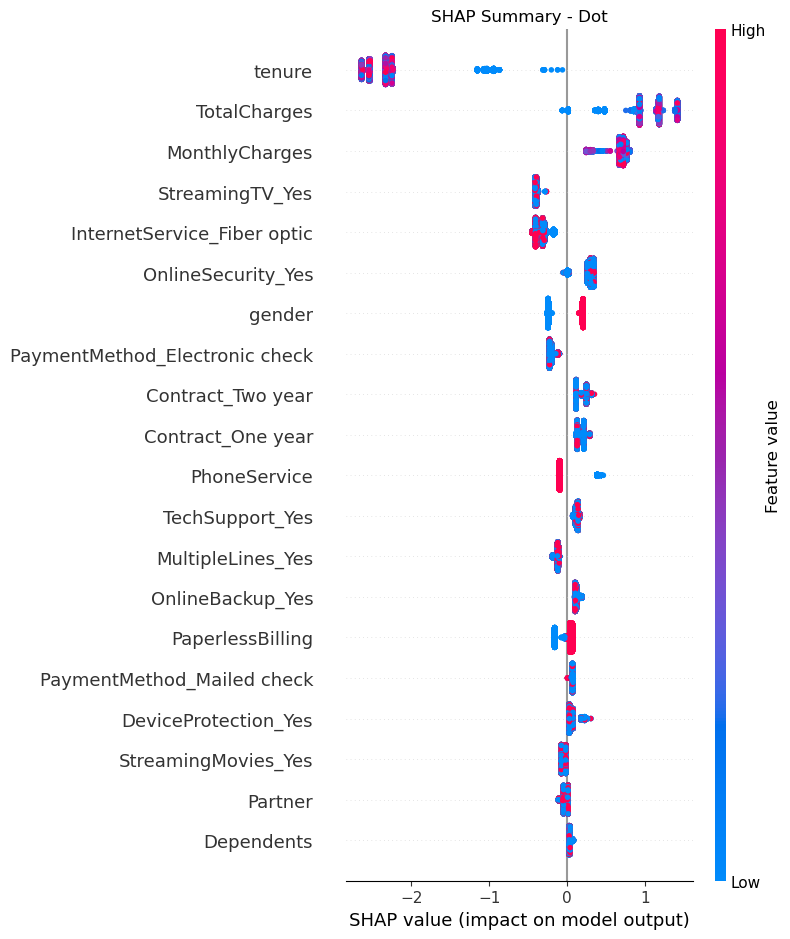

In [36]:
import shap

# Create a SHAP explainer for XGBoost
xgb_model = results['XGBoost']['model']
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X)

# Summary plot (bar)
plt.title('SHAP Summary - Bar')
shap.summary_plot(shap_values, X, plot_type='bar', show=False)
plt.savefig('../outputs/plots/shap_summary_bar.png')
plt.show()

# Summary plot (dot)
plt.title('SHAP Summary - Dot')
shap.summary_plot(shap_values, X, plot_type='dot', show=False)
plt.savefig('../outputs/plots/shap_summary_dot.png')
plt.show()


In [38]:
import joblib
import os

# Create directory
os.makedirs('../models', exist_ok=True)

# Save selected best model
joblib.dump(best_model, '../models/final_model.pkl')

# Save scaler
joblib.dump(scaler, '../models/scaler.pkl')

# Save label encoder
joblib.dump(label_encoder, '../models/label_encoder.pkl')



NameError: name 'best_model' is not defined

In [39]:
best_model = rf_model


In [40]:
best_model = xgb_model  # if XGBoost performed best
